# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
                             'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [80]:
student_data.index += 1 
student_data.index.name = 'StudentID'
df = student_data

In [81]:
df

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Tardies', ylabel='Age'>

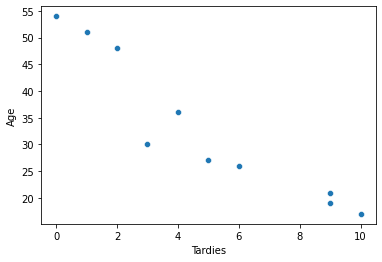

In [82]:
sns.scatterplot(data=df, x="Tardies", y="Age")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
'''
Yes, there seems to be a trend. 
It looks like: the older the student, the fewer number of tardies.
Inversely: the younger the student, the more number of tardies.
'''

<AxesSubplot:xlabel='Tardies', ylabel='Age'>

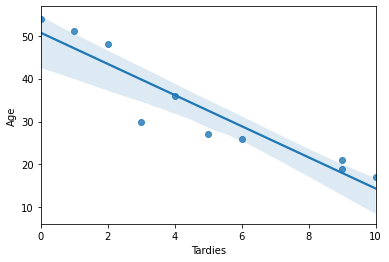

In [88]:
sns.regplot(data=df, x="Tardies", y="Age")

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [83]:
df.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
# correlation between the age of the students and their tardies = -0,94
# This is a strong correlation of variables (very close to -1)
# variables cause or depend on the values of the other variable

In [85]:
df.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [ ]:
# From the covariance we know that:
# variables are not independant (far from zero)
# the relashionship between them is negative, meaning that the variables move in opposite directions:
# As age increases, number of tardies decreases

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [95]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


results = smf.ols('Tardies ~ Age', data=df).fit()
results.summary()

/usr/local/Cellar/jupyterlab/3.0.10/libexec/lib/python3.9/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 21 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        07:35:51   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

In [ ]:
Tardies = 12.8888 -0.2428 * Age
# intercept: ordenada en el origen/eje0 = 12.8888
# age = -0.2428

# Model = 12.8888 +( -0.2428 * Age)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

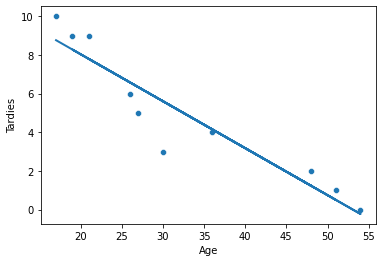

In [105]:
fig, ax1 = plt.subplots(1, 1)
model = 12.8888 + (-0.2428 * df['Age'])

sns.scatterplot(x=df['Age'], y=df['Tardies'])
ax1.plot(df['Age'], model, lw=2)

In [ ]:
# we already knew that our variables were negatively related
# thanks to our model, now we also know that 88.2% of the tardies cases are expalined by the age of the student

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [118]:
# Import any libraries you may need & the data
df_vehicles = pd.read_csv('../lab-regression-analysis/vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [129]:
vehicles = df_vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

In [130]:
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [140]:
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


<AxesSubplot:>

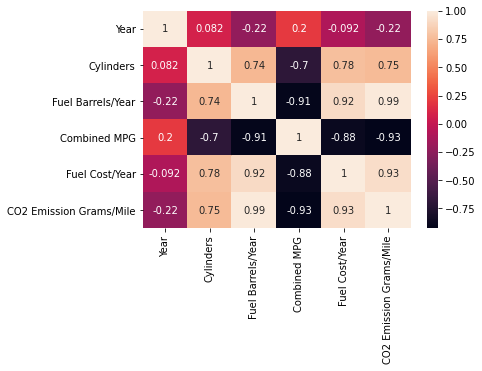

In [141]:
sns.heatmap(vehicles.corr(), annot=True)

In [ ]:
# variable do you think will be the most important in determining CO2 emissions? 
# highest positive correlation: 0.99 --> between 'CO2 Emission Grams/Mile' and 'Fuel Barrels/Year'

# Which provides the least amount of helpful information for determining CO2 emissions? 
# highest negative correlation: -0.93 --> between 'CO2 Emission Grams/Mile' and 'Combined MPG'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [153]:
X = vehicles["CO2 Emission Grams/Mile"]                                       
y = vehicles["Fuel Barrels/Year"] 

car_predictions = smf.ols('y, X', data=vehicles).fit()
car_predictions.summary()

PatsyError: Number of rows mismatch between data argument and y, X (35952 versus 2)
    y, X
    ^^^^

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [89]:
bonus_data = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='X', ylabel='Y'>

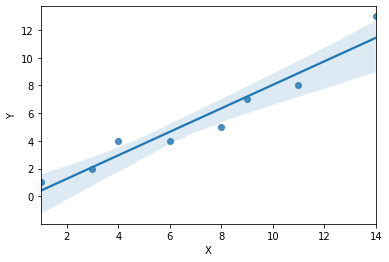

In [90]:
sns.regplot(data=bonus_data, x="X", y="Y")

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# visually, we identify a trend, although the relationship between the variables doesn't seem very strong; 
# most of the data misses the regression line

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [155]:
 def reject_outliers(data):
    u = np.mean(data)
    s = np.std(data)
    data_filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return data_filtered

In [160]:
reject_outliers(str(bonus_data))

TypeError: cannot perform reduce with flexible type

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?